In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


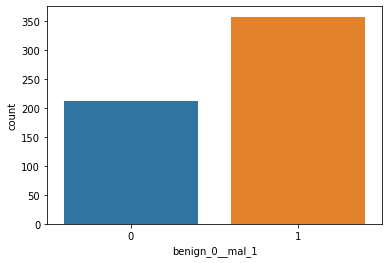

In [7]:
sns.countplot(x='benign_0__mal_1',data=df)

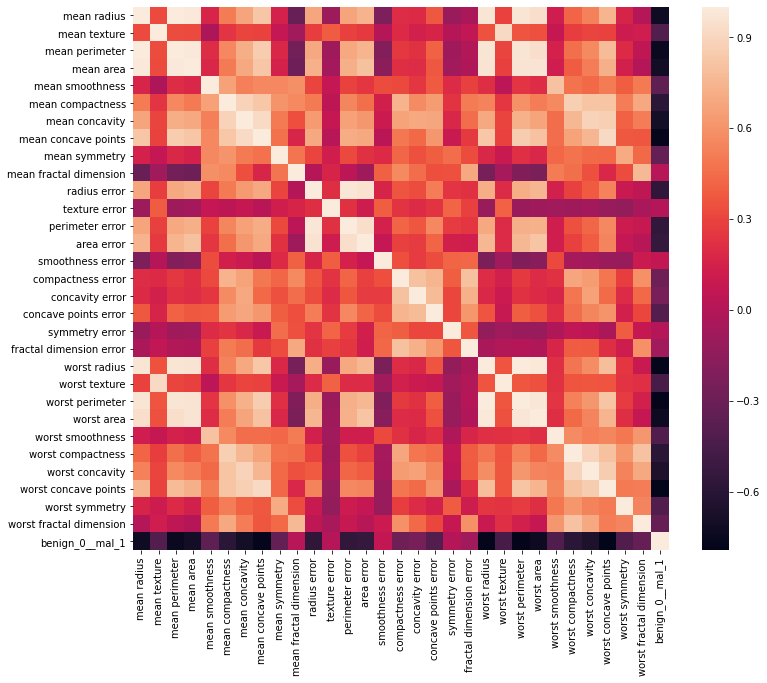

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr())

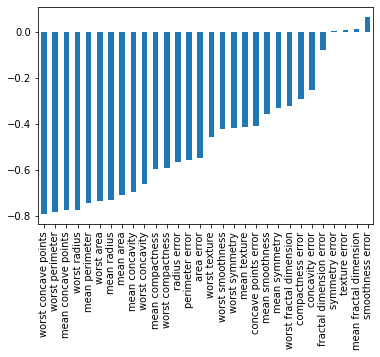

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [12]:
X=df.drop('benign_0__mal_1',axis=1).values
y=df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler=MinMaxScaler()

In [17]:
X_train= scaler.fit_transform(X_train)

In [18]:
X_test= scaler.transform(X_test)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [20]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.fit(x=X_train, y=y_train, epochs=600,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 881us/sample - loss: 0.6717 - val_loss: 0.6431
Epoch 2/600
426/426 [==============================] - 0s 61us/sample - loss: 0.6199 - val_loss: 0.5952
Epoch 3/600
426/426 [==============================] - 0s 56us/sample - loss: 0.5651 - val_loss: 0.5362
Epoch 4/600
426/426 [==============================] - 0s 59us/sample - loss: 0.5033 - val_loss: 0.4740
Epoch 5/600
426/426 [==============================] - 0s 73us/sample - loss: 0.4475 - val_loss: 0.4147
Epoch 6/600
426/426 [==============================] - 0s 61us/sample - loss: 0.3917 - val_loss: 0.3587
Epoch 7/600
426/426 [==============================] - 0s 58us/sample - loss: 0.3479 - val_loss: 0.3060
Epoch 8/600
426/426 [==============================] - 0s 66us/sample - loss: 0.3075 - val_loss: 0.2698
Epoch 9/600
426/426 [======

Epoch 75/600
426/426 [==============================] - 0s 68us/sample - loss: 0.0568 - val_loss: 0.0886
Epoch 76/600
426/426 [==============================] - 0s 74us/sample - loss: 0.0574 - val_loss: 0.0928
Epoch 77/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0545 - val_loss: 0.0929
Epoch 78/600
426/426 [==============================] - 0s 69us/sample - loss: 0.0530 - val_loss: 0.0883
Epoch 79/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0531 - val_loss: 0.0923
Epoch 80/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0531 - val_loss: 0.0986
Epoch 81/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0521 - val_loss: 0.0911
Epoch 82/600
426/426 [==============================] - 0s 50us/sample - loss: 0.0523 - val_loss: 0.0935
Epoch 83/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0565 - val_loss: 0.1072
Epoch 84/600
426/426 [==============================] 

426/426 [==============================] - 0s 49us/sample - loss: 0.0415 - val_loss: 0.0989
Epoch 153/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0405 - val_loss: 0.0932
Epoch 154/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0406 - val_loss: 0.0974
Epoch 155/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0461 - val_loss: 0.1008
Epoch 156/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0422 - val_loss: 0.0949
Epoch 157/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0415 - val_loss: 0.0895
Epoch 158/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0406 - val_loss: 0.0991
Epoch 159/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0434 - val_loss: 0.1017
Epoch 160/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0405 - val_loss: 0.0976
Epoch 161/600
426/426 [==============================] - ETA

426/426 [==============================] - 0s 51us/sample - loss: 0.0343 - val_loss: 0.1019
Epoch 229/600
426/426 [==============================] - 0s 55us/sample - loss: 0.0306 - val_loss: 0.1048
Epoch 230/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0339 - val_loss: 0.0933
Epoch 231/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0307 - val_loss: 0.1019
Epoch 232/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0302 - val_loss: 0.0984
Epoch 233/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0300 - val_loss: 0.1015
Epoch 234/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0314 - val_loss: 0.1010
Epoch 235/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0295 - val_loss: 0.0984
Epoch 236/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0321 - val_loss: 0.0964
Epoch 237/600
426/426 [==============================] - 0s 

Epoch 305/600
426/426 [==============================] - 0s 59us/sample - loss: 0.0219 - val_loss: 0.1102
Epoch 306/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0217 - val_loss: 0.1077
Epoch 307/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0216 - val_loss: 0.1129
Epoch 308/600
426/426 [==============================] - ETA: 0s - loss: 0.037 - 0s 49us/sample - loss: 0.0216 - val_loss: 0.1151
Epoch 309/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0229 - val_loss: 0.1153
Epoch 310/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0224 - val_loss: 0.1282
Epoch 311/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0244 - val_loss: 0.1068
Epoch 312/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0248 - val_loss: 0.1296
Epoch 313/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0233 - val_loss: 0.1046
Epoch 314/600
426/426 

426/426 [==============================] - 0s 49us/sample - loss: 0.0144 - val_loss: 0.1323
Epoch 383/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0173 - val_loss: 0.1384
Epoch 384/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0166 - val_loss: 0.1388
Epoch 385/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0170 - val_loss: 0.1317
Epoch 386/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0148 - val_loss: 0.1296
Epoch 387/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0158 - val_loss: 0.1489
Epoch 388/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0154 - val_loss: 0.1257
Epoch 389/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0149 - val_loss: 0.1395
Epoch 390/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0142 - val_loss: 0.1377
Epoch 391/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 49us/sample - loss: 0.0093 - val_loss: 0.1639
Epoch 459/600
426/426 [==============================] - 0s 54us/sample - loss: 0.0095 - val_loss: 0.1666
Epoch 460/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0094 - val_loss: 0.1504
Epoch 461/600
426/426 [==============================] - 0s 51us/sample - loss: 0.0091 - val_loss: 0.1630
Epoch 462/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0087 - val_loss: 0.1573
Epoch 463/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0091 - val_loss: 0.1572
Epoch 464/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0110 - val_loss: 0.1834
Epoch 465/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0098 - val_loss: 0.1481
Epoch 466/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0105 - val_loss: 0.1707
Epoch 467/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 49us/sample - loss: 0.0058 - val_loss: 0.1800
Epoch 536/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0072 - val_loss: 0.2324
Epoch 537/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0052 - val_loss: 0.1770
Epoch 538/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0065 - val_loss: 0.2164
Epoch 539/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0082 - val_loss: 0.1923
Epoch 540/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0057 - val_loss: 0.1765
Epoch 541/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0055 - val_loss: 0.1897
Epoch 542/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0052 - val_loss: 0.1866
Epoch 543/600
426/426 [==============================] - 0s 52us/sample - loss: 0.0053 - val_loss: 0.1817
Epoch 544/600
426/426 [==============================] - 0s 

In [24]:
losses=pd.DataFrame(model.history.history)

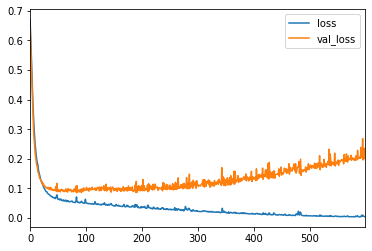

In [25]:
losses.plot()

In [26]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
early_stop=EarlyStopping(monitor='val_loss', mode='min',verbose=1,patience=25)

In [29]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 939us/sample - loss: 0.7036 - val_loss: 0.6864
Epoch 2/600
426/426 [==============================] - 0s 84us/sample - loss: 0.6686 - val_loss: 0.6594
Epoch 3/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6379 - val_loss: 0.6235
Epoch 4/600
426/426 [==============================] - 0s 80us/sample - loss: 0.6008 - val_loss: 0.5806
Epoch 5/600
426/426 [==============================] - 0s 73us/sample - loss: 0.5566 - val_loss: 0.5317
Epoch 6/600
426/426 [==============================] - 0s 72us/sample - loss: 0.5072 - val_loss: 0.4781
Epoch 7/600
426/426 [==============================] - 0s 94us/sample - loss: 0.4548 - val_loss: 0.4235
Epoch 8/600
426/426 [==============================] - 0s 63us/sample - loss: 0.4017 - val_loss: 0.3677
Epoch 9/600
426/426 [==============================] - 0s 82us/sample - loss: 0.3526 - val_loss: 0.3183
Epoch 10/600
426/

426/426 [==============================] - 0s 80us/sample - loss: 0.0555 - val_loss: 0.1094
Epoch 79/600
426/426 [==============================] - 0s 86us/sample - loss: 0.0544 - val_loss: 0.1078
Epoch 80/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0536 - val_loss: 0.1078
Epoch 81/600
426/426 [==============================] - 0s 70us/sample - loss: 0.0522 - val_loss: 0.1073
Epoch 82/600
426/426 [==============================] - 0s 65us/sample - loss: 0.0537 - val_loss: 0.1101
Epoch 83/600
426/426 [==============================] - 0s 63us/sample - loss: 0.0527 - val_loss: 0.1033
Epoch 84/600
426/426 [==============================] - 0s 58us/sample - loss: 0.0547 - val_loss: 0.1224
Epoch 00084: early stopping


In [30]:
model_loss=pd.DataFrame(model.history.history)

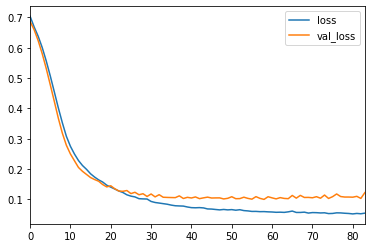

In [31]:
model_loss.plot()

In [32]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [33]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6846 - val_loss: 0.6598
Epoch 2/600
426/426 [==============================] - 0s 96us/sample - loss: 0.6649 - val_loss: 0.6418
Epoch 3/600
426/426 [==============================] - 0s 98us/sample - loss: 0.6521 - val_loss: 0.6227
Epoch 4/600
426/426 [==============================] - 0s 77us/sample - loss: 0.6270 - val_loss: 0.6007
Epoch 5/600
426/426 [==============================] - 0s 97us/sample - loss: 0.6062 - val_loss: 0.5795
Epoch 6/600
426/426 [==============================] - 0s 94us/sample - loss: 0.5843 - val_loss: 0.5537
Epoch 7/600
426/426 [==============================] - 0s 94us/sample - loss: 0.5809 - val_loss: 0.5293
Epoch 8/600
426/426 [==============================] - 0s 89us/sample - loss: 0.5568 - val_loss: 0.5017
Epoch 9/600
426/426 [==============================] - 0s 75us/sample - loss: 0.5353 - val_loss: 0.4757
Epoch 10/600
426/42

426/426 [==============================] - 0s 119us/sample - loss: 0.1340 - val_loss: 0.0956
Epoch 79/600
426/426 [==============================] - 0s 75us/sample - loss: 0.1137 - val_loss: 0.1027
Epoch 80/600
426/426 [==============================] - 0s 73us/sample - loss: 0.1171 - val_loss: 0.0863
Epoch 81/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1239 - val_loss: 0.0931
Epoch 82/600
426/426 [==============================] - 0s 82us/sample - loss: 0.1295 - val_loss: 0.1035
Epoch 83/600
426/426 [==============================] - 0s 80us/sample - loss: 0.1225 - val_loss: 0.0897
Epoch 84/600
426/426 [==============================] - 0s 92us/sample - loss: 0.1205 - val_loss: 0.0911
Epoch 85/600
426/426 [==============================] - 0s 77us/sample - loss: 0.1223 - val_loss: 0.0970
Epoch 86/600
426/426 [==============================] - 0s 77us/sample - loss: 0.1183 - val_loss: 0.0924
Epoch 87/600
426/426 [==============================] - 0s 61us/sa

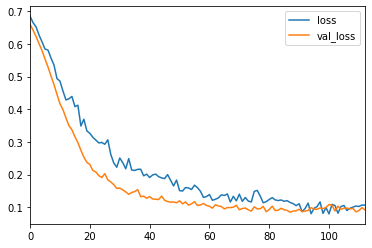

In [34]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [36]:
pred=model.predict_classes(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [39]:
print(confusion_matrix(y_test,pred))

[[54  1]
 [ 3 85]]
